- https://github.com/Tramac/awesome-semantic-segmentation-pytorch/blob/master/core/models/deeplabv3_plus.py

In [177]:
import os
import xml.etree.ElementTree as ET

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [178]:
class VOCDataset(Dataset):
    def __init__(self, root, train=True, transform=None):
        super(VOCDataset, self).__init__()
        self.root = root
        self.transform = transform
        self.classes = (
            'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
            'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
        )
        self.class_to_idx = {_class: i for i, _class in enumerate(self.classes)}

        suffix = 'trainval' if train else 'val'

        files = os.path.join(root, f'ImageSets/Main/{suffix}.txt')
        self.files = [id_.strip() for id_ in open(files)]

    def __getitem__(self, sid):
        name = self.files[sid]
        anno = ET.parse(os.path.join(self.root, 'Annotations', f'{name}.xml'))

        bbox = []
        for obj in anno.findall('object'):
            cname = obj.find('name').text.lower().strip()
            sid = self.classes.index(cname)
            boxEl = obj.find('bndbox')
            box = []
            for tag in ('ymin', 'xmin', 'ymax', 'xmax'):
                box.append(int(boxEl.find(tag).text) - 1)

            box.append(sid)
            bbox.append(box)

        bbox = np.stack(bbox).astype(np.float32)

        img_file = os.path.join(self.root, 'JPEGImages', f'{name}.jpg')
        img = Image.open(img_file)
        if self.transform:
            img = self.transform(img)
        # if img.ndim == 2:
        #     img = img[np.newaxis]

        # (c, h, w) => (h, w, c) (3, 375, 500) => (375, 500, 3)
        img = img.permute(1, 2, 0)

        return img, bbox, name

    def __len__(self):
        return len(self.files)


transform = transforms.Compose([
    # transforms.Resize(256),
    # transforms.RandomCrop(256),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
dataset1 = VOCDataset(root="../../datasets" + "/VOC2012", train=True, transform=transform)
train_loader: DataLoader = torch.utils.data.DataLoader(dataset1, batch_size=64, shuffle=True)

target: 2008_000008


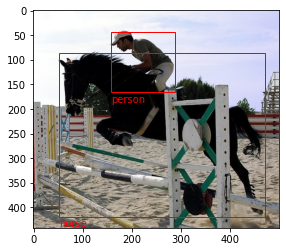

In [193]:
def imshow(img, bbox, name):
    plt.imshow(img)  # img.shape (w, h, c)
    ax = plt.gca()
    for (y1, x1, y2, x2, cid) in bbox:
        label = dataset1.classes[int(cid)]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=1)
        plt.annotate(label, xy=(x1, y2 + 20), color='red')
        ax.add_patch(rect)

    plt.show()


img, bbox, name = train_loader.dataset[3]
print(f"target: {name}")
imshow(img, bbox, name)

In [180]:
class DeeplabV3plus(nn.Module):
    def __init__(self) -> None:
        super(DeeplabV3plus).__init__()

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

    def encode(self, x):
        return x

    def decode(self, x):
        return x